In [ ]:
# Shopping Trend Analysis

In [22]:
import pandas as pd
df=pd.read_csv('shopping_trends_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [26]:
df.isnull().any()

Customer ID               False
Age                       False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
dtype: bool

In [28]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

In [32]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [34]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

([0, 1, 2, 3],
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Fall'),
  Text(2, 0, 'Winter'),
  Text(3, 0, 'Summer')])

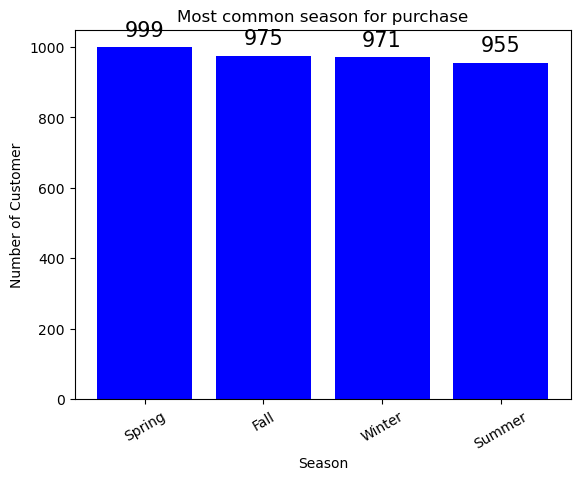

In [36]:
#Question 1. What is the most common season for purchases ?

import matplotlib.pyplot as plt
import numpy as np

x=df['Season'].value_counts()

plt.title('Most common season for purchase')
plt.xlabel('Season')
plt.ylabel('Number of Customer')
a=plt.bar(x.index,x.values,color='b')
plt.bar_label(a,padding=5,fontsize=15)
plt.xticks(rotation=30)


([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

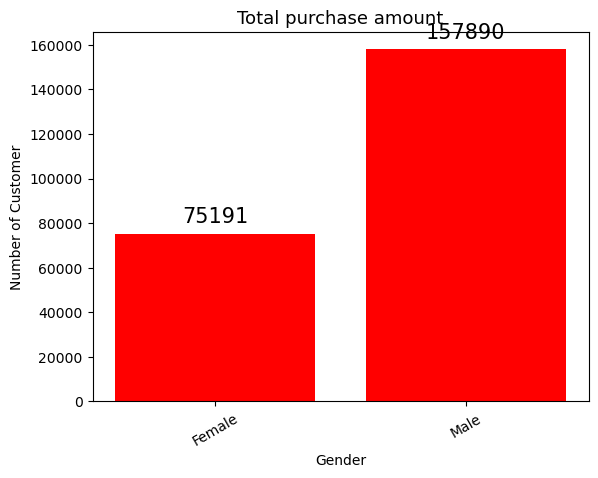

In [38]:
#Question 2. What is the total purchase amount for each gender ?

import matplotlib.pyplot as plt
import numpy as np

x=df.groupby('Gender')['Purchase Amount (USD)'].sum()

plt.title('Total purchase amount',fontsize=13)
plt.xlabel('Gender')
plt.ylabel('Number of Customer')
a=plt.bar(x.index,x.values,color='r')
plt.bar_label(a,padding=5,fontsize=15)
plt.xticks(rotation=30)

In [40]:
#Question 3. What is the average age of customers who made purchases in the Summer season ?

cust=df.query("Season=='Summer'")
cust['Age'].mean()

43.973821989528794

In [42]:
#Question 4. How many customers used a promo code for their purchase ?

customer_promo=df.query("`Promo Code Used`=='Yes'")
a = customer_promo['Promo Code Used'].count()
print(a)

1677


In [44]:
#Question 5. What is the maximum and minimum review rating in the dataset ?

x=df['Review Rating'].max()
print("Maximum Review Rating:",x)

y=df['Review Rating'].min()
print("Minimum Review Rating:",y)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PayPal'),
  Text(1, 0, 'Credit Card'),
  Text(2, 0, 'Bank Transfer'),
  Text(3, 0, 'Cash'),
  Text(4, 0, 'Venmo'),
  Text(5, 0, 'Debit Card')])

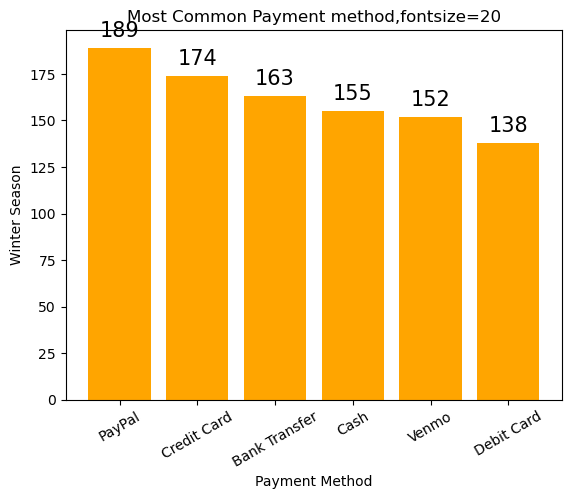

In [46]:
#Question 6. What is the most common payment method for customers who shop in the Winter season ?

import matplotlib.pyplot as plt
import numpy as np

customer1=df.query("Season=='Winter'")
x=customer1['Payment Method'].value_counts()
plt.title('Most Common Payment method,fontsize=20')
plt.xlabel('Payment Method')
plt.ylabel('Winter Season')
a=plt.bar(x.index,x.values,color='orange')
plt.bar_label(a,padding=5,fontsize=15)
plt.xticks(rotation=30)

([0, 1, 2, 3],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Accessories'),
  Text(2, 0, 'Footwear'),
  Text(3, 0, 'Outerwear')])

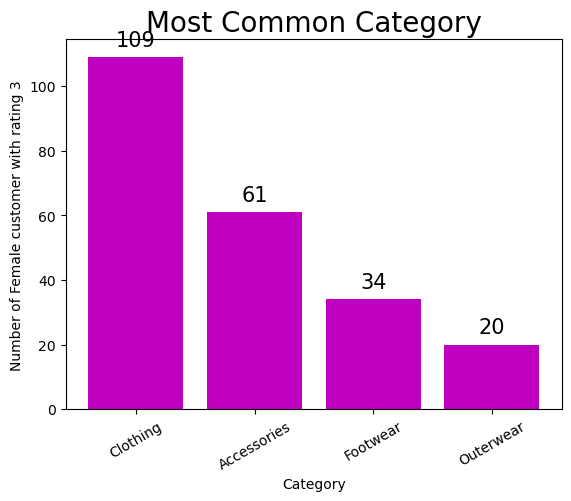

In [48]:
#Question 7. What is the most common category of items purchased by female customers with a review rating below 3 ?

import matplotlib.pyplot as plt
import numpy as np

customer2= df.query("Gender =='Female' and `Review Rating`<3 ")
x=customer2['Category'].value_counts()
plt.title('Most Common Category',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Number of Female customer with rating 3')
a=plt.bar(x.index,x.values,color='m')
plt.bar_label(a,padding=5,fontsize=15)
plt.xticks(rotation=30)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Hawaii'),
  Text(11, 0, 'Idaho'),
  Text(12, 0, 'Illinois'),
  Text(13, 0, 'Indiana'),
  Text(14, 0, 'Iowa'),
  Text(15, 0, 'Kansas'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Louisiana'),
  Text(18, 0, 'Maine'),
  Text(19, 0, 'Maryland'),
  Text(20, 0, 'Massachusetts'),
  Text(21, 0, 'Michigan'),
  Text(22, 0, 'Minnesota'),
  Text(23, 0, 'Mississippi'),
  Text(24, 0, 'Missouri'),
  Text(25, 0, 'Montana'),
  Text(26, 0, 'Nebraska'

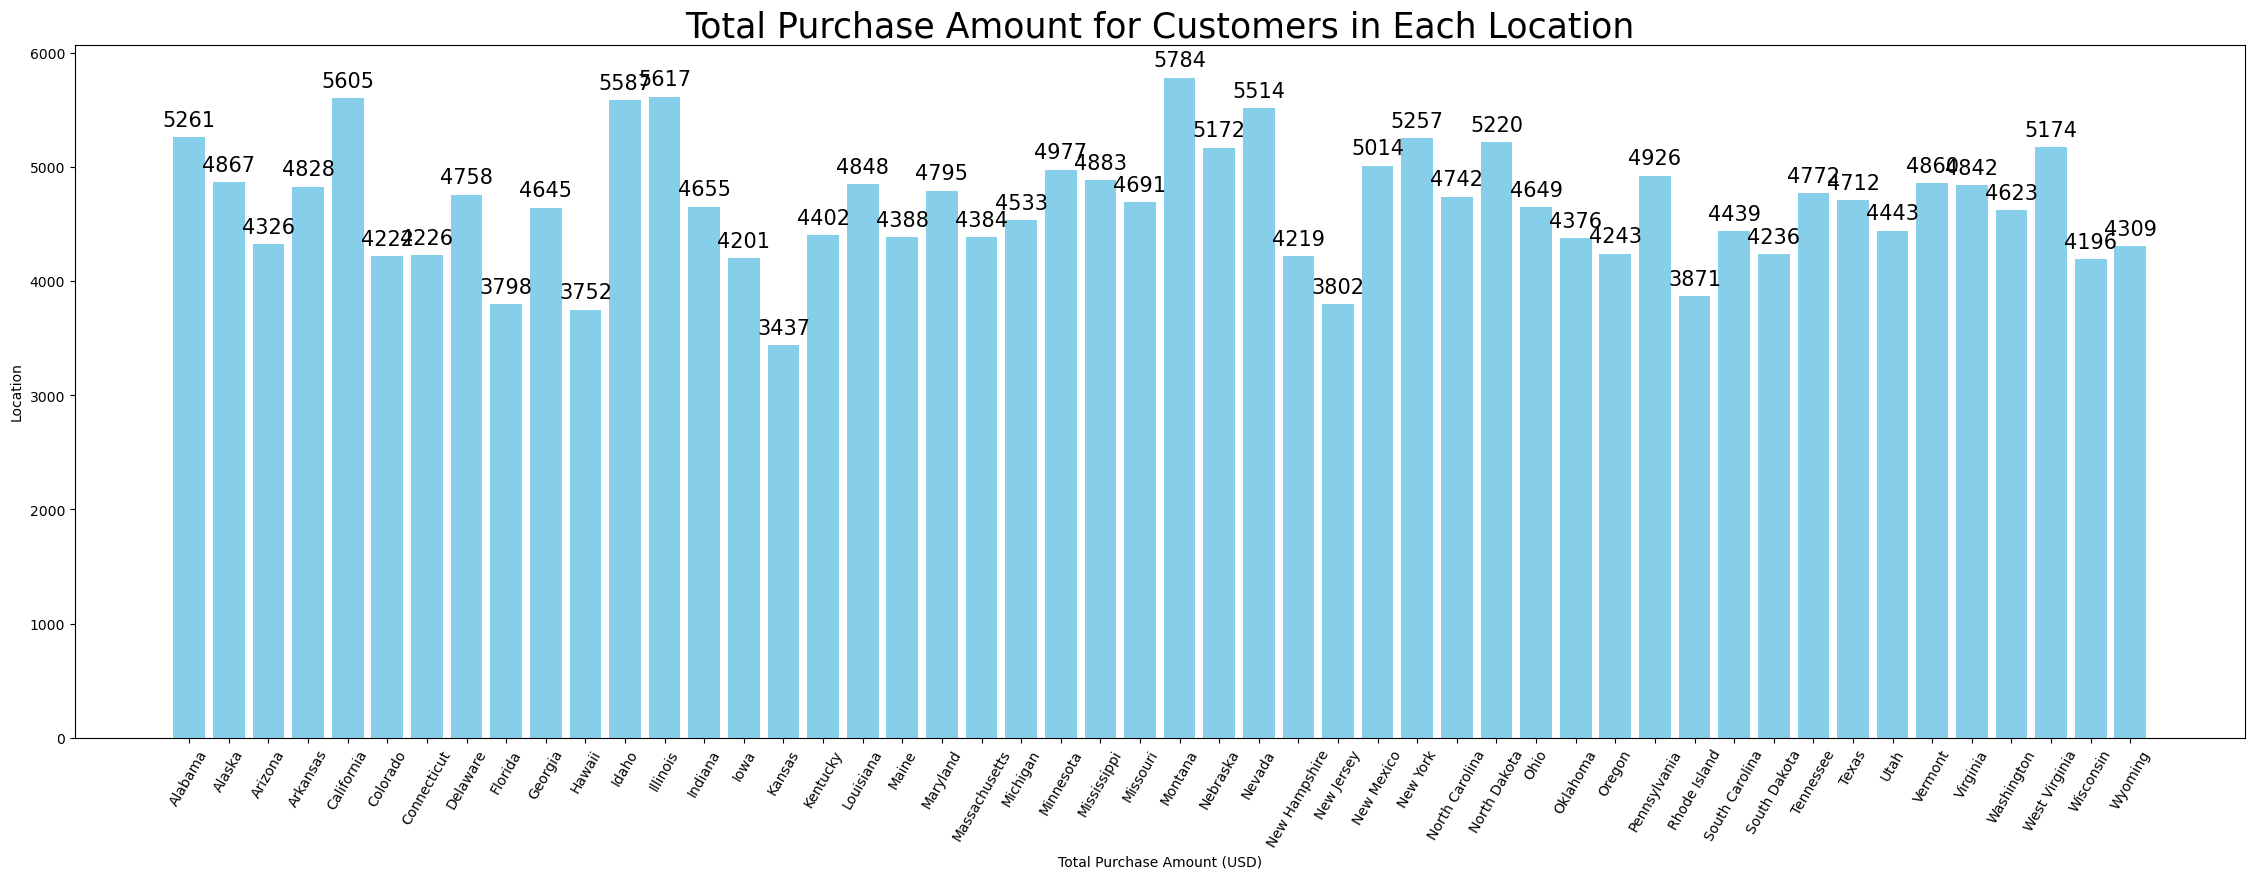

In [50]:
#Question 8. What is the total purchase amount for customers in each location ?

import matplotlib.pyplot as plt
import numpy as np

loc1=df.groupby('Location')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(28,9))
x=plt.bar(loc1.index,loc1.values,color='skyblue')
plt.bar_label(x,padding=5,fontsize=15)
plt.title('Total Purchase Amount for Customers in Each Location', fontsize=25)
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Location')
plt.xticks(rotation=60)

Text(0.5, 1.0, 'Correlation Matrix')

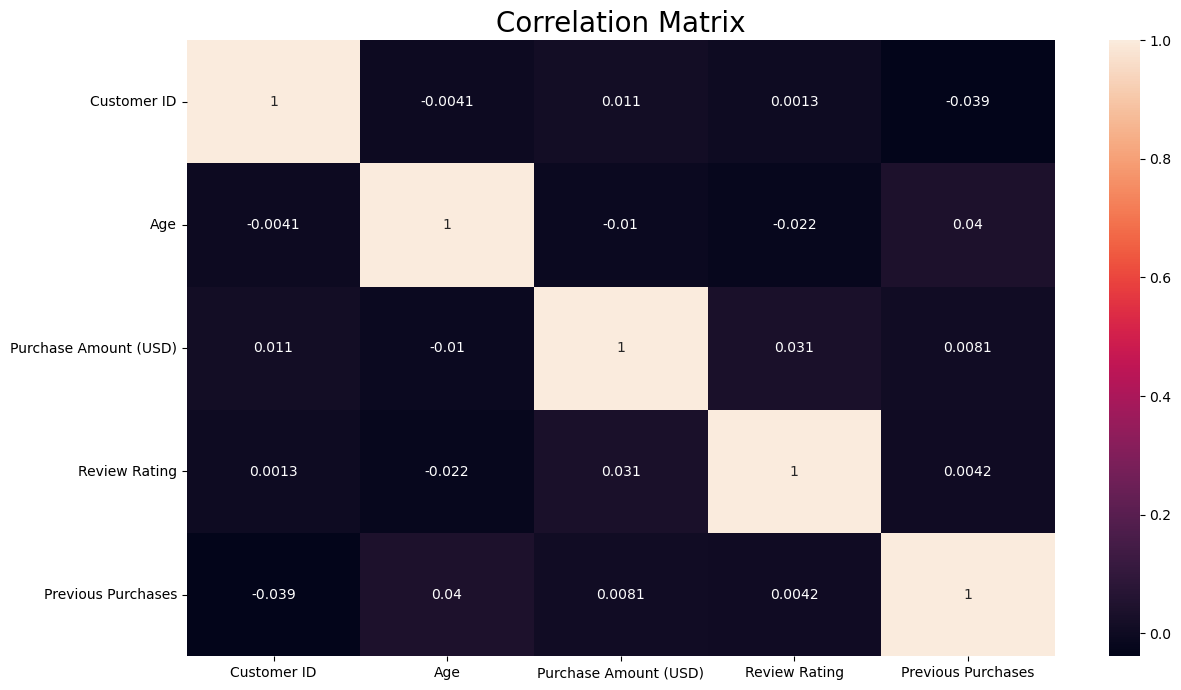

In [52]:
#Question 9. Plot the correlation between different numerical columns?

import seaborn as sns
import matplotlib.pyplot as plt

column = ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
numeric_df = df[column]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix',fontsize=20)

(array([418., 384., 371., 361., 385., 422., 381., 390., 361., 427.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

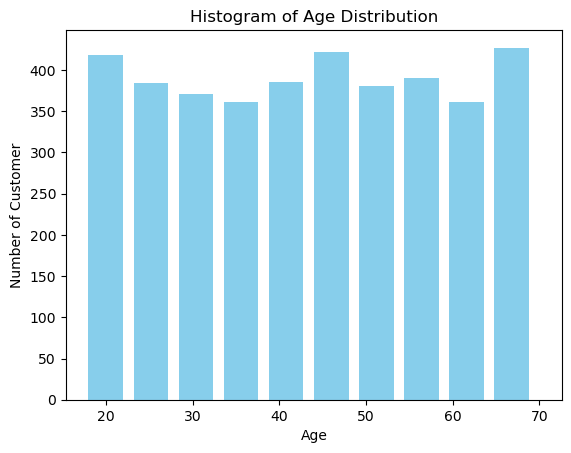

In [54]:
#Question 10. Plot the Histogram of Age Distribution?

import matplotlib.pyplot as plt
import numpy as np
x=df['Age']
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.hist(x,width=4,color='skyblue')

Text(0, 0.5, 'Age')

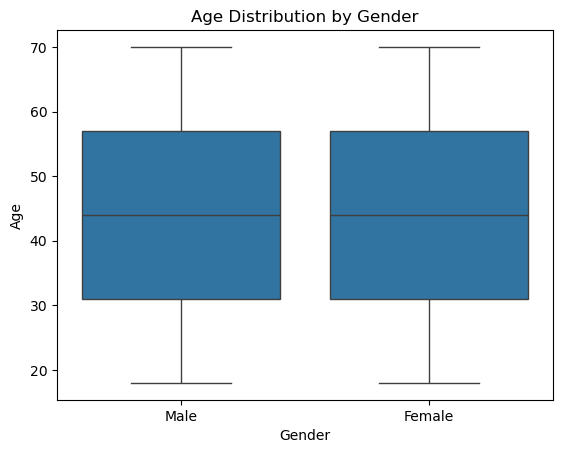

In [56]:
#Question 11. What is the distribution of customers by age and gender?

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Montana'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Idaho'),
  Text(3, 0, 'Illinois'),
  Text(4, 0, 'Alabama'),
  Text(5, 0, 'Minnesota'),
  Text(6, 0, 'Nebraska'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'Nevada'),
  Text(9, 0, 'Maryland'),
  Text(10, 0, 'Delaware'),
  Text(11, 0, 'Vermont'),
  Text(12, 0, 'Louisiana'),
  Text(13, 0, 'North Dakota'),
  Text(14, 0, 'Missouri'),
  Text(15, 0, 'West Virginia'),
  Text(16, 0, 'New Mexico'),
  Text(17, 0, 'Mississippi'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Georgia'),
  Text(20, 0, 'Kentucky'),
  Text(21, 0, 'Arkansas'),
  Text(22, 0, 'North Carolina'),
  Text(23, 0, 'Connecticut'),
  Text(24, 0, 'Virginia'),
  Text(25, 0, 'Ohio'),
  Te

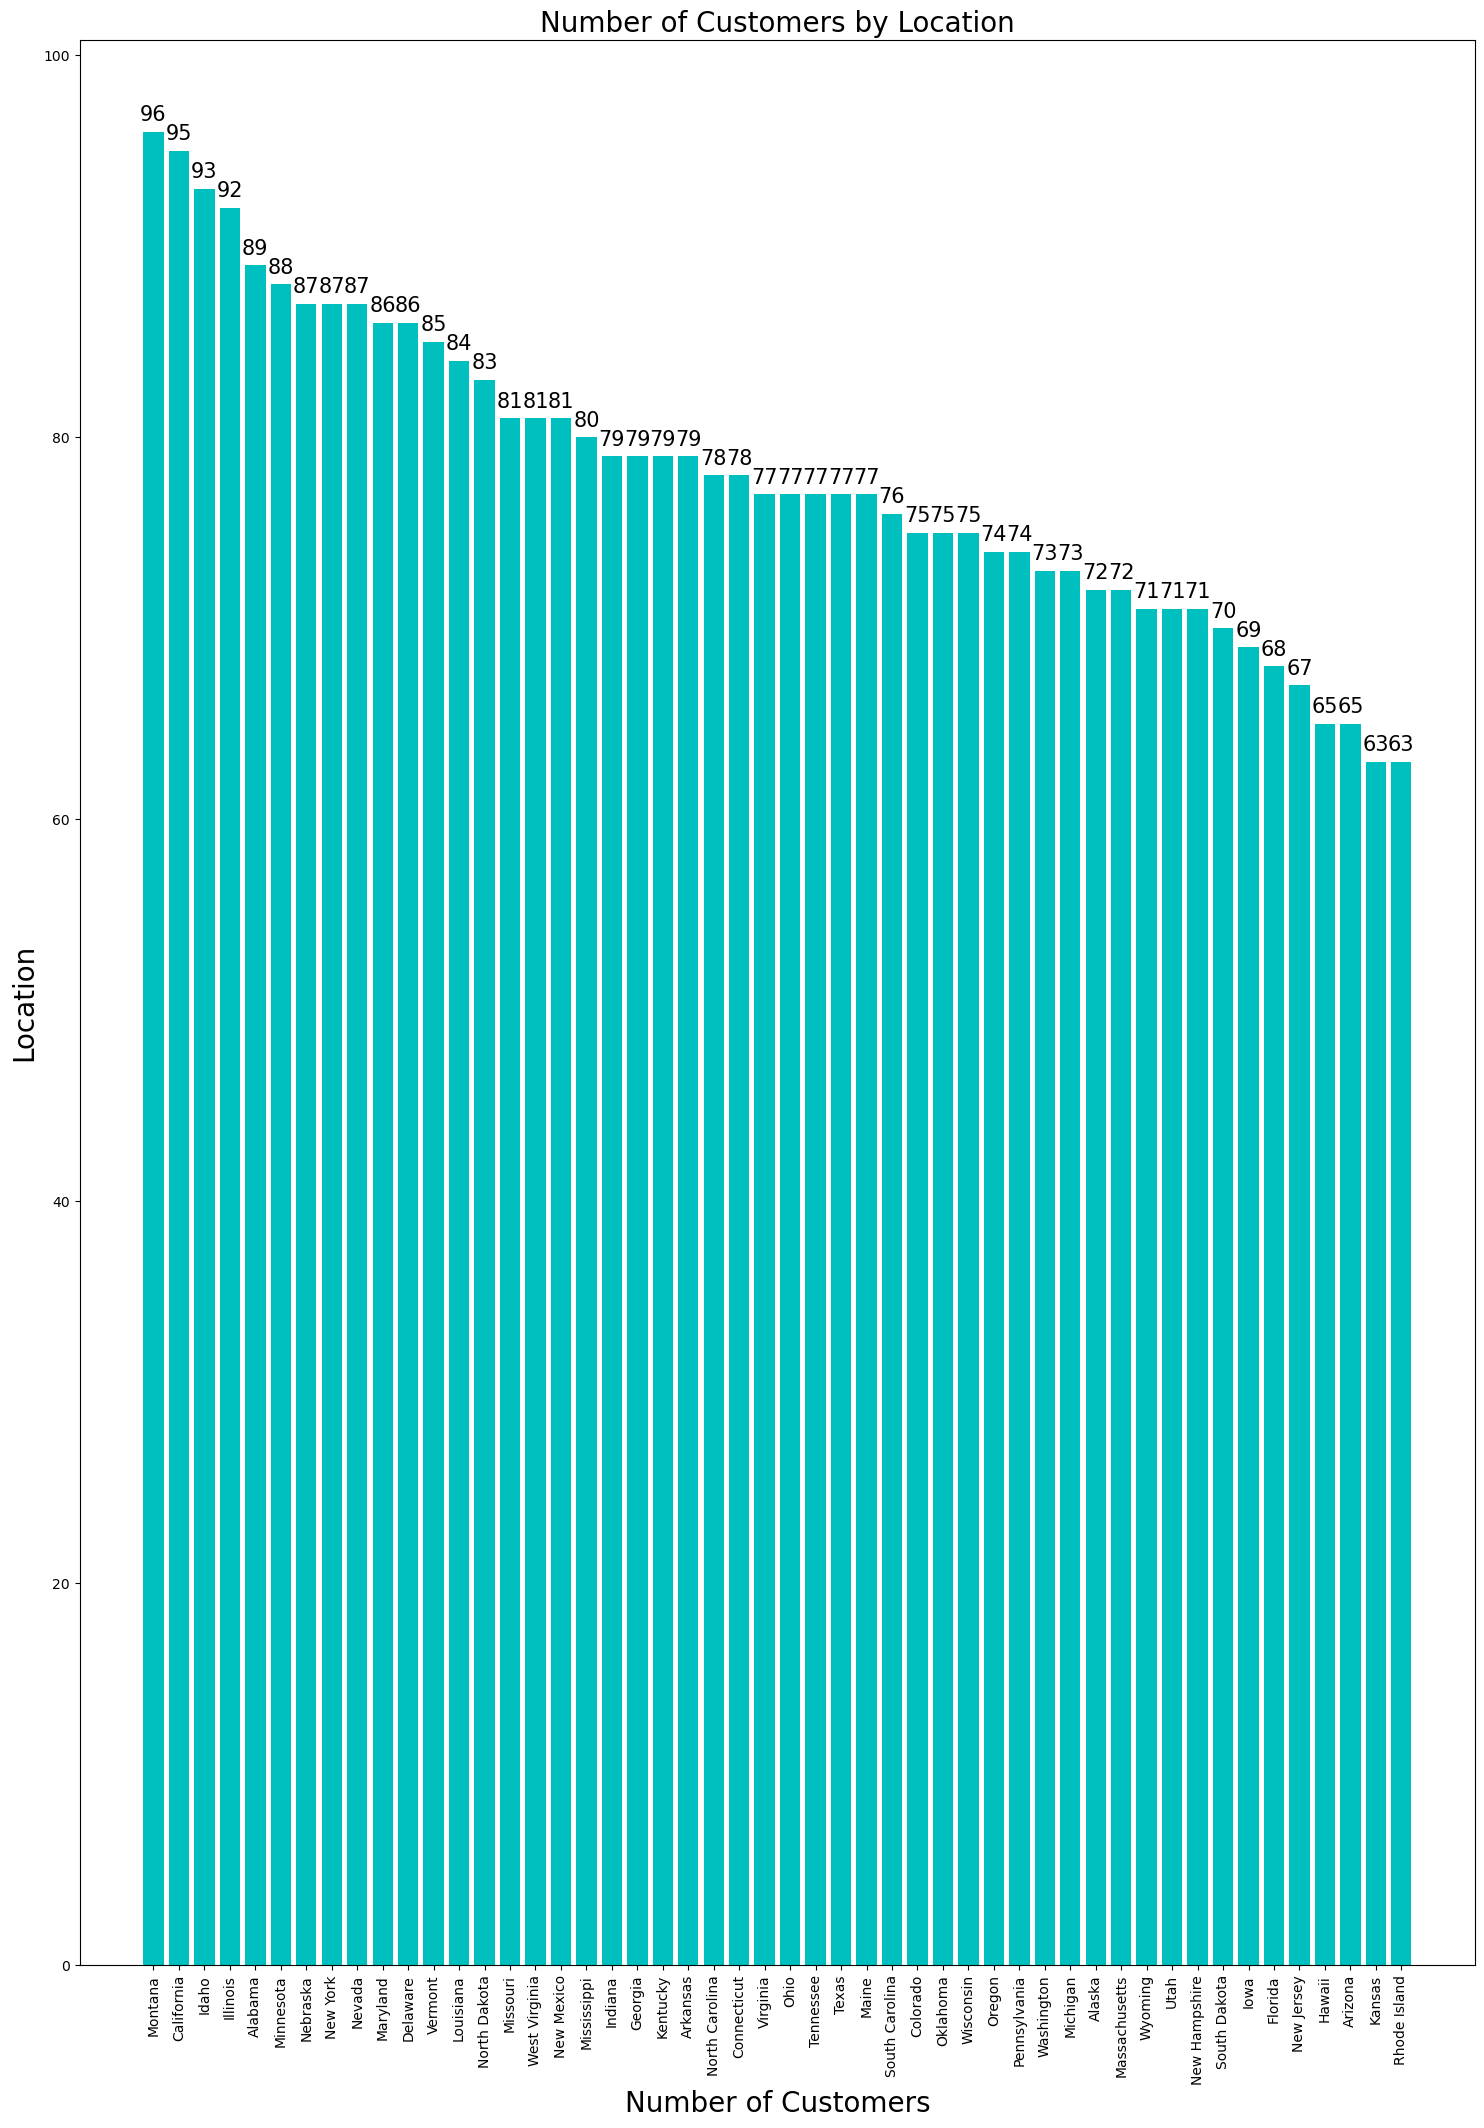

In [107]:
#Question 12. Which regions or locations have the highest number of customers ?

import matplotlib.pyplot as plt
x= df['Location'].value_counts()
plt.figure(figsize=(18, 25))
a=plt.bar(x.index,x.values, color='c')
plt.bar_label(a,padding=5,fontsize=15)
plt.title('Number of Customers by Location', fontsize=20)
plt.xlabel('Number of Customers', fontsize=20)
plt.ylabel('Location', fontsize=20)
plt.xticks(rotation=90)

Text(0, 0.5, 'Number of Customers')

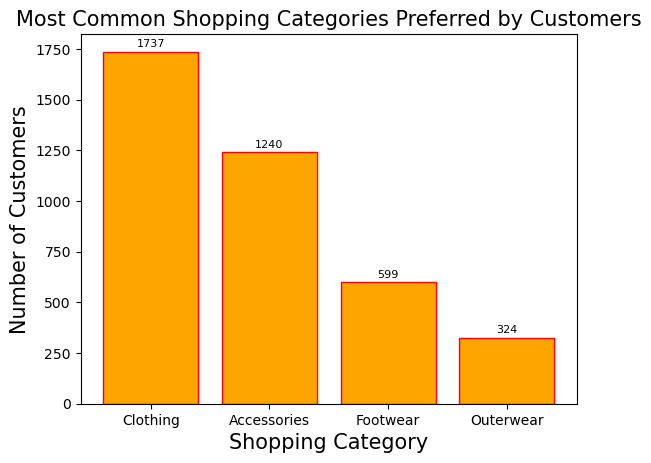

In [109]:
#Question 13. What are the most common shopping categories preferred by customers?

import matplotlib.pyplot as plt
x=df['Category'].value_counts()
a=plt.bar(x.index,x.values,color='orange',edgecolor='r')
plt.bar_label(a,padding=2,fontsize=8)
plt.title('Most Common Shopping Categories Preferred by Customers', fontsize=15)
plt.xlabel('Shopping Category', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)

Text(37.88094328703704, 0.5, 'Frequency of Purchases')

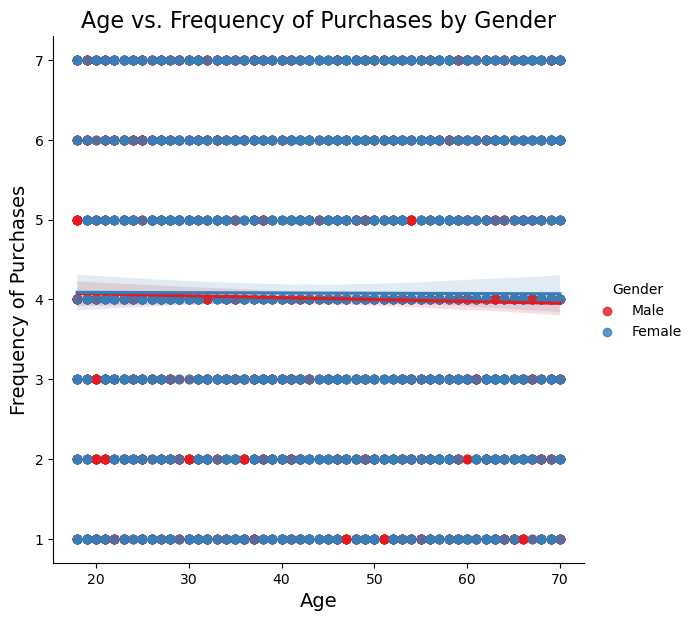

In [62]:
# Question 14. How does the frequency of shopping vary by age or income group ?

import seaborn as sns
import matplotlib.pyplot as plt
frequency_mapping = {'Fortnightly': 1,'Weekly': 2,'Annually': 3,'Quarterly': 4,'Bi-Weekly':5,'Monthly':6,'Every 3 Months':7}
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)
sns.lmplot(data=df, x='Age', y='Frequency of Purchases', hue='Gender', palette='Set1', height=6)
plt.title('Age vs. Frequency of Purchases by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency of Purchases', fontsize=14)

Text(0, 0.5, 'Total Purchase Amount (USD)')

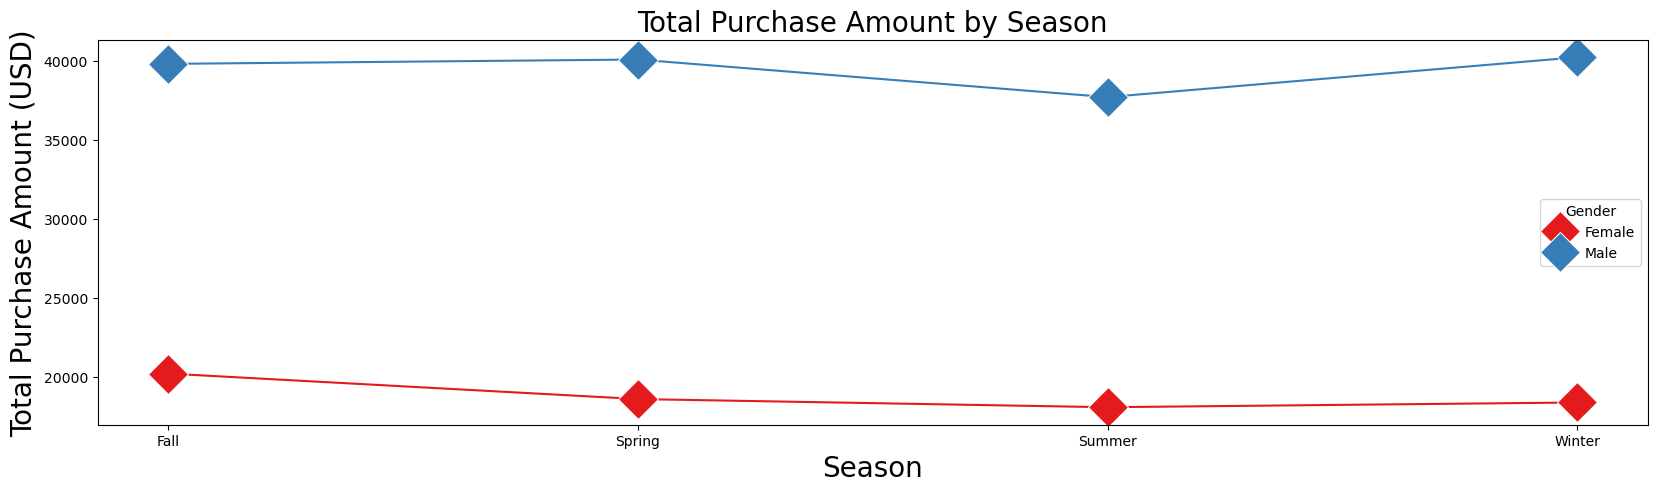

In [105]:
# Question 15. Are there any seasonal trends in shopping behavior ?

seasonal_trends = df.groupby(['Season','Gender'])['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(20, 5))
sns.lineplot(data=seasonal_trends, x='Season', y='Purchase Amount (USD)',hue='Gender',marker='D', markersize=20,palette='Set1')
plt.title('Total Purchase Amount by Season', fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Total Purchase Amount (USD)', fontsize=20)